In [1]:
##CASE STUDY - Lead Score analysis

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Step 1: Data Loading, Data Understanding and Preparation

Import/Load the data using Pandas and understand its structure.

In [3]:
#reading Dataset
Lead_Data = pd.read_csv(r"C:\Users\Dell\Desktop\Datascience\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
Lead_Data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Checking the info on the columns and null value present in each column
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
round(100*(Lead_Data.isnull().sum()/len(Lead_Data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [6]:
#Converting the 'Select' value present in few columns to 'NaN'
Lead_Data['Lead Quality'].replace(['Select'],['NaN'], inplace= True)
Lead_Data['City'].replace(['Select'],['NaN'], inplace= True)
Lead_Data['Lead Profile'].replace(['Select'],['NaN'], inplace= True)
Lead_Data['Specialization'].replace(['Select'],['NaN'], inplace= True)
Lead_Data['How did you hear about X Education'].replace(['Select'],['NaN'], inplace= True)
Lead_Data['Country'].replace(['unknown'],['NaN'], inplace= True)
Lead_Data.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [7]:
#Dropping the columns with null values more than 3000 and also the irrelavant columns as per data dictionary
Lead_Data = Lead_Data.drop(['Lead Quality','How did you hear about X Education','Newspaper','Search','Magazine','Newspaper Article','X Education Forums','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Do Not Call','Do Not Email','City','Specialization','Country','Tags','I agree to pay the amount through cheque','Prospect ID','A free copy of Mastering The Interview','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Last Notable Activity','Lead Number'], axis=1)
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
What is your current occupation                  6550 non-null object
What matters most to you in choosing a course    6531 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 649.8+ KB


In [8]:
#Creating dummy variables
lo= pd.get_dummies(Lead_Data['Lead Origin'], prefix='leadOrigin', drop_first=True)
#Adding the results to the master dataframe
Lead_Data = pd.concat([Lead_Data,lo], axis=1)

# Creating dummy variables for the variable 'Lead Source'.
ls = pd.get_dummies(Lead_Data['Lead Source'], prefix='leadSource', drop_first=True)
# Adding the results to the master dataframe
Lead_Data = pd.concat([Lead_Data,ls], axis=1)

# Creating dummy variables for the variable 'Lead Activity'.
la = pd.get_dummies(Lead_Data['Last Activity'], prefix='lastActivity', drop_first=True)
# Adding the results to the master dataframe
Lead_Data = pd.concat([Lead_Data,la], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'. 
co = pd.get_dummies(Lead_Data['What is your current occupation'], prefix='currentOccupation')
# Adding the results to the master dataframe
Lead_Data = pd.concat([Lead_Data,co], axis=1)

# Creating dummy variables for the variable 'What matters most to you in choosing a course'. 
ms = pd.get_dummies(Lead_Data['What matters most to you in choosing a course'], prefix='mattersMost')
# Adding the results to the master dataframe
Lead_Data = pd.concat([Lead_Data,ms], axis=1)

In [9]:
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 58 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
What is your current occupation                  6550 non-null object
What matters most to you in choosing a course    6531 non-null object
leadOrigin_Landing Page Submission               9240 non-null uint8
leadOrigin_Lead Add Form                         9240 non-null uint8
leadOrigin_Lead Import                           9240 non-null uint8
leadOrigin_Quick Add Form                        9240 no

In [10]:
#Dropping the original columns from which dummy variables were created and also dummy columns which were insignificant
Lead_Data = Lead_Data.drop(['leadSource_blog','leadSource_bing','leadSource_Live Chat','leadSource_Social Media','leadSource_Press_Release','leadSource_NC_EDM','leadSource_Pay per Click Ads','leadSource_welearnblog_Home','leadSource_WeLearn','leadSource_youtubechannel','leadSource_testone','leadSource_Facebook','leadSource_Referral Sites','leadSource_Welingak Website','lastActivity_Email Received','lastActivity_Form Submitted on Website','lastActivity_Resubscribed to emails','lastActivity_View in browser link Clicked','lastActivity_Email Marked Spam','lastActivity_Had a Phone Conversation','lastActivity_Unreachable','lastActivity_Unsubscribed','lastActivity_Email Bounced','lastActivity_Email Link Clicked','Lead Origin','Lead Source','Last Activity','What is your current occupation','What matters most to you in choosing a course'], axis=1)
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
Converted                                  9240 non-null int64
TotalVisits                                9103 non-null float64
Total Time Spent on Website                9240 non-null int64
Page Views Per Visit                       9103 non-null float64
leadOrigin_Landing Page Submission         9240 non-null uint8
leadOrigin_Lead Add Form                   9240 non-null uint8
leadOrigin_Lead Import                     9240 non-null uint8
leadOrigin_Quick Add Form                  9240 non-null uint8
leadSource_Direct Traffic                  9240 non-null uint8
leadSource_Google                          9240 non-null uint8
leadSource_Olark Chat                      9240 non-null uint8
leadSource_Organic Search                  9240 non-null uint8
leadSource_Reference                       9240 non-null uint8
leadSource_google                          9240 non-null uint8
lastAct

In [11]:
#Checking for Outliers
num_Lead = Lead_Data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_Lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


Outlier treatment to be done after the PCS training set

In [12]:
#Removing the outliers
Q1 = Lead_Data.TotalVisits.quantile(0.25)
Q3 = Lead_Data.TotalVisits.quantile(0.75)
IQR = Q3 - Q1
Lead_Data = Lead_Data[(Lead_Data.TotalVisits >= Q1 - 1.5*IQR) & (Lead_Data.TotalVisits <= Q3 + 1.5*IQR)]

In [13]:
#Converting the Column names to remove gaps
Lead_Data.rename(columns={'Total Time Spent on Website':'TotalTimeWebsite',
                          'Page Views Per Visit':'PageViewVisits'}, 
                 inplace=True)

In [14]:
Lead_Data.describe()

,Converted,TotalVisits,TotalTimeWebsite,PageViewVisits,leadOrigin_Landing Page Submission,leadOrigin_Lead Add Form,leadOrigin_Lead Import,leadOrigin_Quick Add Form,leadSource_Direct Traffic,leadSource_Google,...,lastActivity_Visited Booth in Tradeshow,currentOccupation_Businessman,currentOccupation_Housewife,currentOccupation_Other,currentOccupation_Student,currentOccupation_Unemployed,currentOccupation_Working Professional,mattersMost_Better Career Prospects,mattersMost_Flexibility & Convenience,mattersMost_Other
count,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.0,8836.000000,8836.000000,...,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000
mean,0.378452,2.985627,474.798891,2.275965,0.530217,0.068357,0.003508,0.0,0.277501,0.317338,...,0.000113,0.000792,0.001019,0.001471,0.023087,0.602309,0.074694,0.701109,0.000113,0.000113
std,0.485029,2.582935,543.461506,1.961492,0.499114,0.252371,0.059131,0.0,0.447791,0.465467,...,0.010638,0.028137,0.031900,0.038331,0.150190,0.489449,0.262913,0.457798,0.010638,0.010638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,237.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,4.000000,903.000000,3.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,11.000000,2272.000000,11.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
Q1 = Lead_Data.PageViewVisits.quantile(0.25)
Q3 = Lead_Data.PageViewVisits.quantile(0.75)
IQR = Q3 - Q1
Lead_Data = Lead_Data[(Lead_Data.PageViewVisits >= Q1 - 1.5*IQR) & (Lead_Data.PageViewVisits <= Q3 + 1.5*IQR)]
Lead_Data.describe()

,Converted,TotalVisits,TotalTimeWebsite,PageViewVisits,leadOrigin_Landing Page Submission,leadOrigin_Lead Add Form,leadOrigin_Lead Import,leadOrigin_Quick Add Form,leadSource_Direct Traffic,leadSource_Google,...,lastActivity_Visited Booth in Tradeshow,currentOccupation_Businessman,currentOccupation_Housewife,currentOccupation_Other,currentOccupation_Student,currentOccupation_Unemployed,currentOccupation_Working Professional,mattersMost_Better Career Prospects,mattersMost_Flexibility & Convenience,mattersMost_Other
count,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.0,8542.000000,8542.000000,...,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000
mean,0.378366,2.810700,469.778740,2.076613,0.521306,0.070592,0.003512,0.0,0.277218,0.319831,...,0.000117,0.000585,0.001054,0.001405,0.023180,0.600562,0.074924,0.699368,0.000117,0.000117
std,0.485008,2.435562,542.851967,1.654045,0.499575,0.256158,0.059162,0.0,0.447651,0.466438,...,0.010820,0.024188,0.032444,0.037457,0.150482,0.489812,0.263284,0.458560,0.010820,0.010820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,233.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,4.000000,888.750000,3.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,11.000000,2272.000000,6.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#Checking for null values from current columns
round(100*(Lead_Data.isnull().sum()/len(Lead_Data.index)), 2)

Converted                                  0.0
TotalVisits                                0.0
TotalTimeWebsite                           0.0
PageViewVisits                             0.0
leadOrigin_Landing Page Submission         0.0
leadOrigin_Lead Add Form                   0.0
leadOrigin_Lead Import                     0.0
leadOrigin_Quick Add Form                  0.0
leadSource_Direct Traffic                  0.0
leadSource_Google                          0.0
leadSource_Olark Chat                      0.0
leadSource_Organic Search                  0.0
leadSource_Reference                       0.0
leadSource_google                          0.0
lastActivity_Converted to Lead             0.0
lastActivity_Email Opened                  0.0
lastActivity_Olark Chat Conversation       0.0
lastActivity_Page Visited on Website       0.0
lastActivity_SMS Sent                      0.0
lastActivity_Visited Booth in Tradeshow    0.0
currentOccupation_Businessman              0.0
currentOccupa

In [17]:
Lead_Data.head()

,Converted,TotalVisits,TotalTimeWebsite,PageViewVisits,leadOrigin_Landing Page Submission,leadOrigin_Lead Add Form,leadOrigin_Lead Import,leadOrigin_Quick Add Form,leadSource_Direct Traffic,leadSource_Google,...,lastActivity_Visited Booth in Tradeshow,currentOccupation_Businessman,currentOccupation_Housewife,currentOccupation_Other,currentOccupation_Student,currentOccupation_Unemployed,currentOccupation_Working Professional,mattersMost_Better Career Prospects,mattersMost_Flexibility & Convenience,mattersMost_Other
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [18]:
#Standardization
df = Lead_Data[['TotalVisits','TotalTimeWebsite','PageViewVisits']]
normalized_df=(df-df.mean())/df.std()
Lead_Data = Lead_Data.drop(['TotalVisits','TotalTimeWebsite','PageViewVisits'], 1)
Lead_Data = pd.concat([Lead_Data,normalized_df],axis=1)
Lead_Data.head()

,Converted,leadOrigin_Landing Page Submission,leadOrigin_Lead Add Form,leadOrigin_Lead Import,leadOrigin_Quick Add Form,leadSource_Direct Traffic,leadSource_Google,leadSource_Olark Chat,leadSource_Organic Search,leadSource_Reference,...,currentOccupation_Other,currentOccupation_Student,currentOccupation_Unemployed,currentOccupation_Working Professional,mattersMost_Better Career Prospects,mattersMost_Flexibility & Convenience,mattersMost_Other,TotalVisits,TotalTimeWebsite,PageViewVisits
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,-1.154025,-0.865390,-1.255476
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0.898889,0.376201,0.255971
2,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,-0.332860,1.956742,-0.046319
3,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,-0.743442,-0.303543,-0.650897
4,1,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,-0.332860,1.765161,-0.650897


In [19]:
#Checking the Coverted Rate
Converted = (sum(Lead_Data['Converted'])/len(Lead_Data['Converted'].index))*100
Converted

37.83657223132756

In [20]:
from sklearn.model_selection import train_test_split
X = Lead_Data.drop(['Converted'],axis=1)

# Putting response variable to y
y = Lead_Data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [22]:
import statsmodels.api as sm

In [23]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5952
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2418.9
Date:                Sun, 03 Mar 2019   Deviance:                       4837.8
Time:                        13:22:27   Pearson chi2:                 5.94e+03
No. Iterations:                    22   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.8280      0.347     -8.141      0.000      -3.509      -2.147
leadOrigin_Landing Page Submission         -0.1868      0.109     -1.711      0.087      -0.401       0.027
leadOrigin_Lead Add Form                    4.6685      0.614      7.603      0.000       3.465       5.872
leadOrigin_Lead Import                      0.3376      0.670      0.504      0.614      -0.975       1.650
leadOrigin_Quick Add Form               -8.764e-11   2.42e-07     -0.000      1.000   -4.75e-07    4.75e-07
leadSource_Direct Traffic                  -0.2682      0.331     -0.810      0.418      -0.917       0.381
leadSource_Google                           0.0551      0.322      0.171      0.864      -0.576       0.686
leadSource_Olark Chat                       1.2798      0.345      3.704      0.000       0.603       1.957
leadSource_Organic Search                  -0.1320      0.332     -0.398      0.691      -0.782       0.519
leadSource_Reference                       -1.0446      0.566     -1.846      0.065      -2.154       0.065
leadSource_google                         -21.2626   5.21e+04     -0.000      1.000   -1.02e+05    1.02e+05
lastActivity_Converted to Lead             -0.5349      0.256     -2.091      0.037      -1.036      -0.033
lastActivity_Email Opened                   0.6806      0.138      4.927      0.000       0.410       0.951
lastActivity_Olark Chat Conversation       -1.0257      0.212     -4.844      0.000      -1.441      -0.611
lastActivity_Page Visited on Website        0.0155      0.201      0.077      0.938      -0.379       0.410
lastActivity_SMS Sent                       1.8221      0.141     12.894      0.000       1.545       2.099
lastActivity_Visited Booth in Tradeshow  1.832e-11   2.55e-07    7.2e-05      1.000   -4.99e-07    4.99e-07
currentOccupation_Businessman             -20.2682    2.2e+04     -0.001      0.999    -4.3e+04     4.3e+04
currentOccupation_Housewife                 2.5770   4.36e+04    5.9e-05      1.000   -8.55e+04    8.55e+04
currentOccupation_Other                   -21.7309    2.2e+04     -0.001      0.999    -4.3e+04     4.3e+04
currentOccupation_Student                 -21.4822    2.2e+04     -0.001      0.999    -4.3e+04     4.3e+04
currentOccupation_Unemployed              -21.5363    2.2e+04     -0.001      0.999    -4.3e+04     4.3e+04
currentOccupation_Working Professional    -18.9118    2.2e+04     -0.001      0.999    -4.3e+04     4.3e+04
mattersMost_Better Career Prospects        22.8629    2.2e+04      0.001      0.999    -4.3e+04     4.3e+04
mattersMost_Flexibility & Convenience      47.0199   8.24e+04      0.001      1.000   -1.62e+05    1.62e+05
mattersMost_Other                           1.9534   8.24e+04   2.37e-05      1.000   -1.62e+05    1.62e+05
TotalVisits                   

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

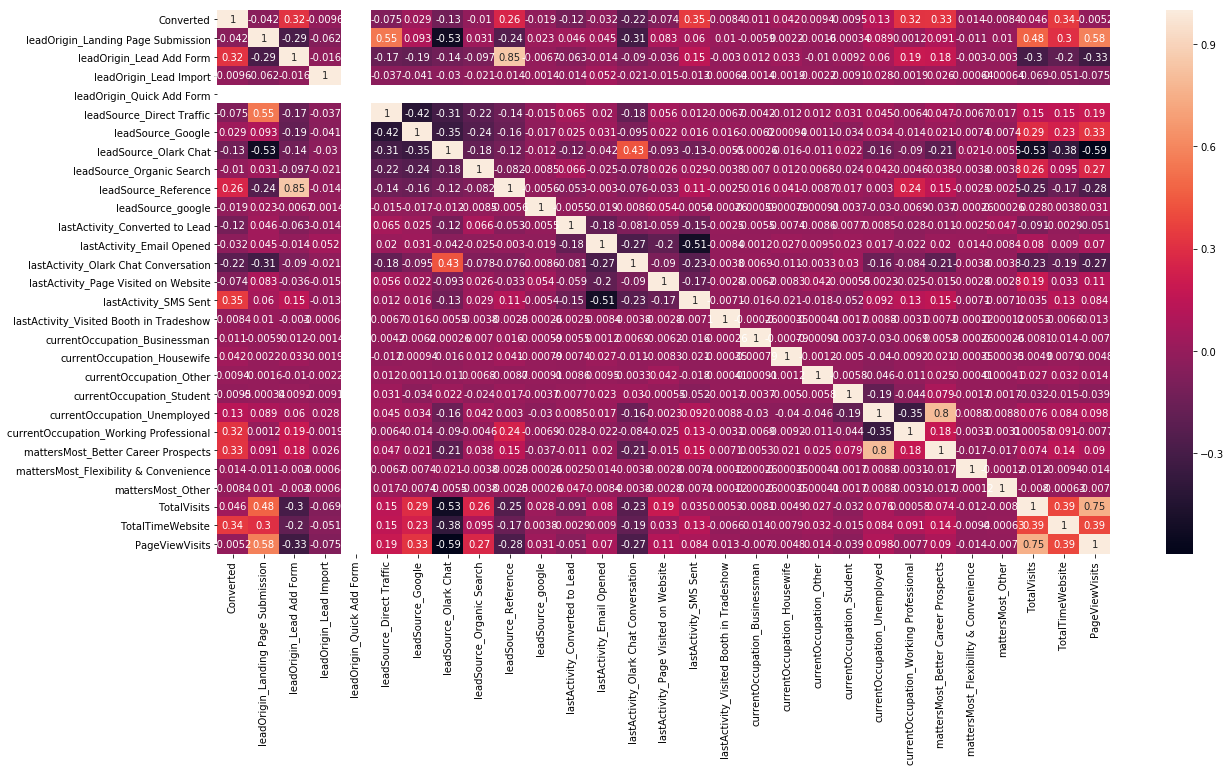

In [25]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Lead_Data.corr(),annot = True)

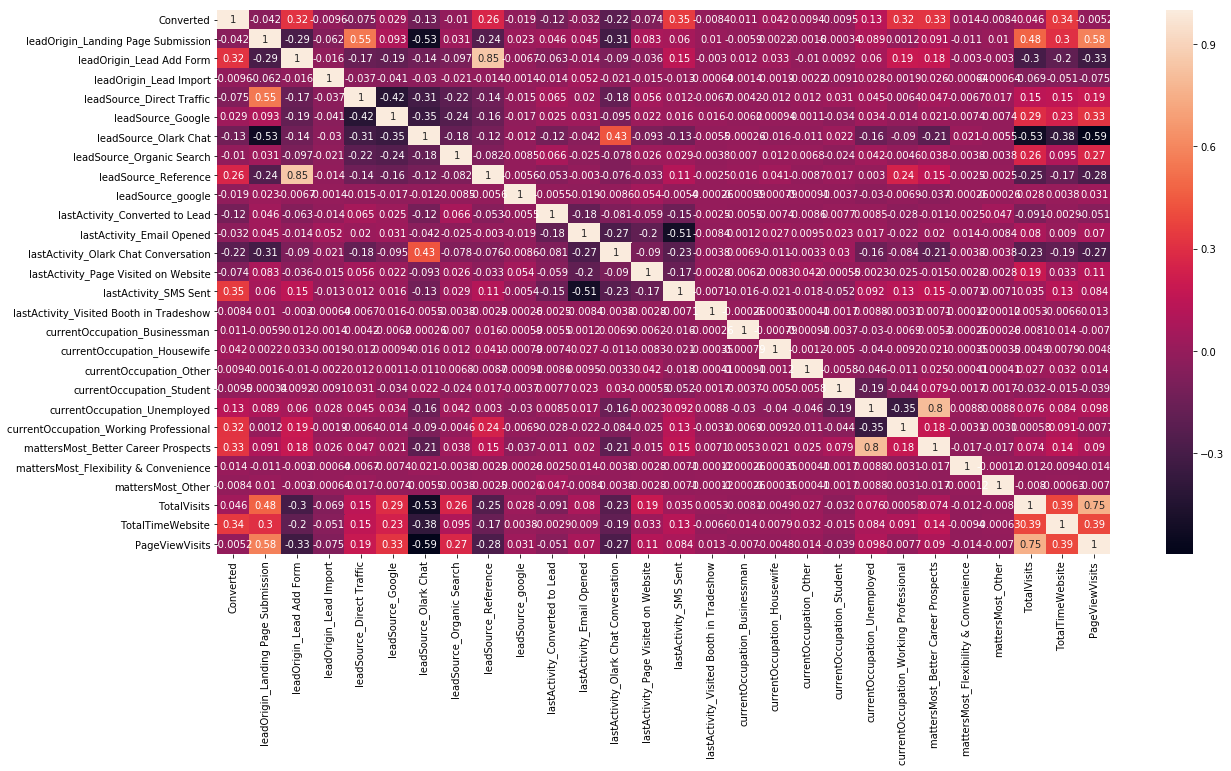

In [26]:
Lead_Data = Lead_Data.drop(['leadOrigin_Quick Add Form'],axis=1)
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Lead_Data.corr(),annot = True)

In [27]:
X_test2 = X_test.drop(['leadOrigin_Quick Add Form'],axis=1)
X_train2 = X_train.drop(['leadOrigin_Quick Add Form'],axis=1)

In [28]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5952
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2418.9
Date:                Sun, 03 Mar 2019   Deviance:                       4837.8
Time:                        13:22:36   Pearson chi2:                 5.94e+03
No. Iterations:                    22   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.8280      0.347     -8.141      0.000      -3.509      -2.147
leadOrigin_Landing Page Submission         -0.1868      0.109     -1.711      0.087      -0.401       0.027
leadOrigin_Lead Add Form                    4.6685      0.614      7.603      0.000       3.465       5.872
leadOrigin_Lead Import                      0.3376      0.670      0.504      0.614      -0.975       1.650
leadSource_Direct Traffic                  -0.2682      0.331     -0.810      0.418      -0.917       0.381
leadSource_Google                           0.0551      0.322      0.171      0.864      -0.576       0.686
leadSource_Olark Chat                       1.2798      0.345      3.704      0.000       0.603       1.957
leadSource_Organic Search                  -0.1320      0.332     -0.398      0.691      -0.782       0.519
leadSource_Reference                       -1.0446      0.566     -1.846      0.065      -2.154       0.065
leadSource_google                         -21.2626   5.21e+04     -0.000      1.000   -1.02e+05    1.02e+05
lastActivity_Converted to Lead             -0.5349      0.256     -2.091      0.037      -1.036      -0.033
lastActivity_Email Opened                   0.6806      0.138      4.927      0.000       0.410       0.951
lastActivity_Olark Chat Conversation       -1.0257      0.212     -4.844      0.000      -1.441      -0.611
lastActivity_Page Visited on Website        0.0155      0.201      0.077      0.938      -0.379       0.410
lastActivity_SMS Sent                       1.8221      0.141     12.894      0.000       1.545       2.099
lastActivity_Visited Booth in Tradeshow  6.669e-11   1.67e-07      0.000      1.000   -3.28e-07    3.28e-07
currentOccupation_Businessman             -20.2682    2.2e+04     -0.001      0.999    -4.3e+04     4.3e+04
currentOccupation_Housewife                 2.5770   4.36e+04    5.9e-05      1.000   -8.55e+04    8.55e+04
currentOccupation_Other                   -21.7309    2.2e+04     -0.001      0.999    -4.3e+04     4.3e+04
currentOccupation_Student                 -21.4822    2.2e+04     -0.001      0.999    -4.3e+04     4.3e+04
currentOccupation_Unemployed              -21.5363    2.2e+04     -0.001      0.999    -4.3e+04     4.3e+04
currentOccupation_Working Professional    -18.9118    2.2e+04     -0.001      0.999    -4.3e+04     4.3e+04
mattersMost_Better Career Prospects        22.8629    2.2e+04      0.001      0.999    -4.3e+04     4.3e+04
mattersMost_Flexibility & Convenience      47.0199   8.24e+04      0.001      1.000   -1.62e+05    1.62e+05
mattersMost_Other                           1.9535   8.24e+04   2.37e-05      1.000   -1.62e+05    1.62e+05
TotalVisits                                 0.2937      0.055      5.383      0.000       0.187       0.401
TotalTimeWebsite              

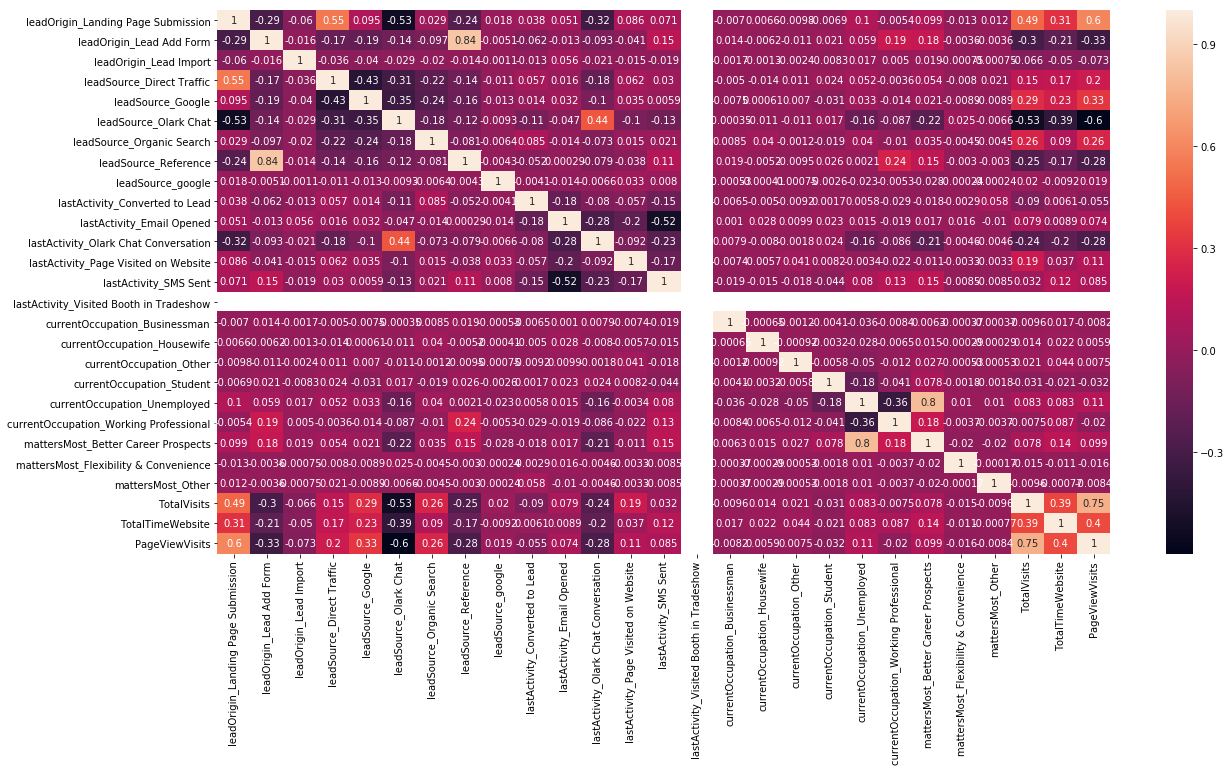

In [29]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

In [30]:
X_test3 = X_test2.drop(['lastActivity_Visited Booth in Tradeshow'],axis=1)
X_train3 = X_train2.drop(['lastActivity_Visited Booth in Tradeshow'],axis=1)

In [31]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train3)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5952
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2418.9
Date:                Sun, 03 Mar 2019   Deviance:                       4837.8
Time:                        13:22:40   Pearson chi2:                 5.94e+03
No. Iterations:                    22   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.8280      0.347     -8.141      0.000      -3.509      -2.147
leadOrigin_Landing Page Submission        -0.1868      0.109     -1.711      0.087      -0.401       0.027
leadOrigin_Lead Add Form                   4.6685      0.614      7.603      0.000       3.465       5.872
leadOrigin_Lead Import                     0.3376      0.670      0.504      0.614      -0.975       1.650
leadSource_Direct Traffic                 -0.2682      0.331     -0.810      0.418      -0.917       0.381
leadSource_Google                          0.0551      0.322      0.171      0.864      -0.576       0.686
leadSource_Olark Chat                      1.2798      0.345      3.704      0.000       0.603       1.957
leadSource_Organic Search                 -0.1320      0.332     -0.398      0.691      -0.782       0.519
leadSource_Reference                      -1.0446      0.566     -1.846      0.065      -2.154       0.065
leadSource_google                        -21.2626   5.21e+04     -0.000      1.000   -1.02e+05    1.02e+05
lastActivity_Converted to Lead            -0.5349      0.256     -2.091      0.037      -1.036      -0.033
lastActivity_Email Opened                  0.6806      0.138      4.927      0.000       0.410       0.951
lastActivity_Olark Chat Conversation      -1.0257      0.212     -4.844      0.000      -1.441      -0.611
lastActivity_Page Visited on Website       0.0155      0.201      0.077      0.938      -0.379       0.410
lastActivity_SMS Sent                      1.8221      0.141     12.894      0.000       1.545       2.099
currentOccupation_Businessman            -20.2682    2.2e+04     -0.001      0.999    -4.3e+04     4.3e+04
currentOccupation_Housewife                2.5770   4.36e+04    5.9e-05      1.000   -8.55e+04    8.55e+04
currentOccupation_Other                  -21.7308    2.2e+04     -0.001      0.999    -4.3e+04     4.3e+04
currentOccupation_Student                -21.4822    2.2e+04     -0.001      0.999    -4.3e+04     4.3e+04
currentOccupation_Unemployed             -21.5363    2.2e+04     -0.001      0.999    -4.3e+04     4.3e+04
currentOccupation_Working Professional   -18.9118    2.2e+04     -0.001      0.999    -4.3e+04     4.3e+04
mattersMost_Better Career Prospects       22.8628    2.2e+04      0.001      0.999    -4.3e+04     4.3e+04
mattersMost_Flexibility & Convenience     47.0199   8.24e+04      0.001      1.000   -1.62e+05    1.62e+05
mattersMost_Other                          1.9534   8.24e+04   2.37e-05      1.000   -1.62e+05    1.62e+05
TotalVisits                                0.2937      0.055      5.383      0.000       0.187       0.401
TotalTimeWebsite                           1.0809      0.042     25.833      0.000       0.999       1.163
PageViewVisits                            -0.1788      0.06

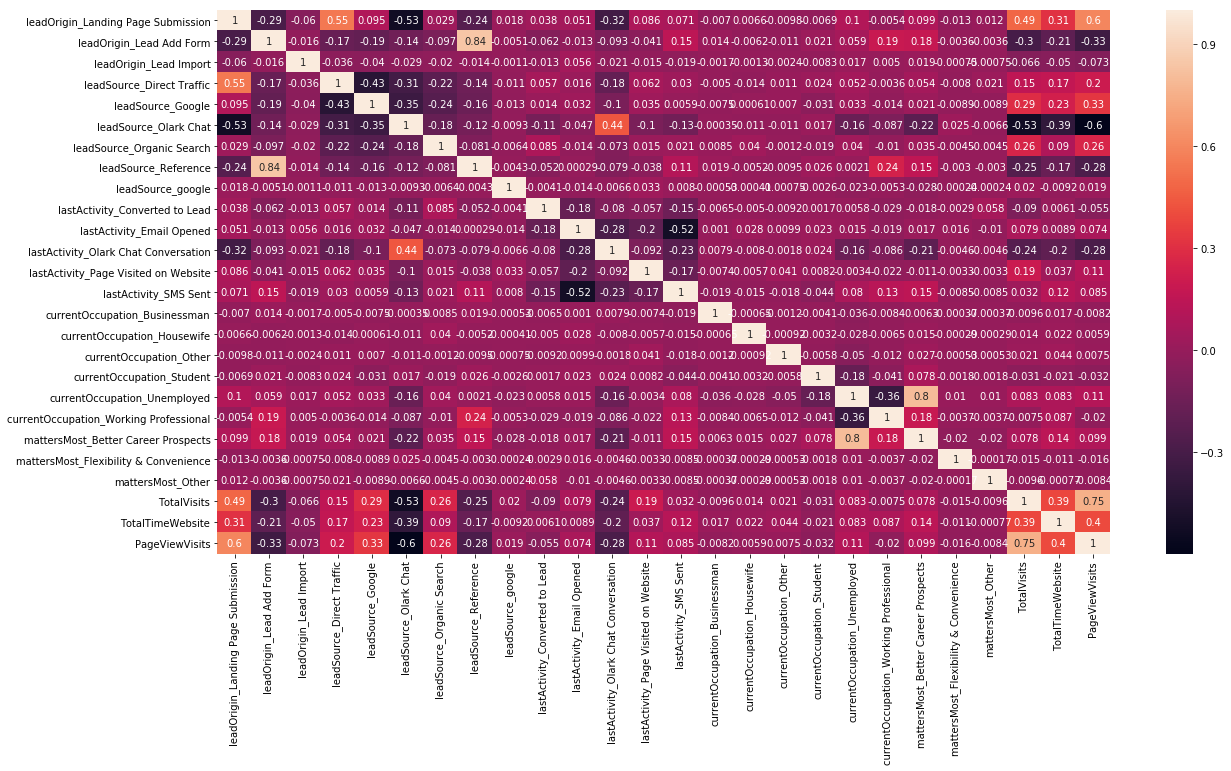

In [32]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train3.corr(),annot = True)

In [33]:
X_test4 = X_test3.drop(['TotalVisits','TotalTimeWebsite','mattersMost_Better Career Prospects','leadOrigin_Landing Page Submission','leadSource_Direct Traffic','leadSource_Google','leadSource_Olark Chat','lastActivity_Email Opened'],axis=1)
X_train4 = X_train3.drop(['TotalVisits','TotalTimeWebsite','mattersMost_Better Career Prospects','leadOrigin_Landing Page Submission','leadSource_Direct Traffic','leadSource_Google','leadSource_Olark Chat','lastActivity_Email Opened'],axis=1)

In [34]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train4)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5960
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2897.3
Date:                Sun, 03 Mar 2019   Deviance:                       5794.5
Time:                        13:22:44   Pearson chi2:                 5.81e+03
No. Iterations:                    21   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.9269      0.080    -24.054      0.000      -2.084      -1.770
leadOrigin_Lead Add Form                   3.4909      0.518      6.742      0.000       2.476       4.506
leadOrigin_Lead Import                    -0.8652      0.580     -1.491      0.136      -2.002       0.272
leadSource_Organic Search                 -0.0166      0.103     -0.162      0.871      -0.218       0.184
leadSource_Reference                      -1.0453      0.563     -1.857      0.063      -2.149       0.058
leadSource_google                        -21.1667   3.15e+04     -0.001      0.999   -6.17e+04    6.16e+04
lastActivity_Converted to Lead            -1.2639      0.203     -6.218      0.000      -1.662      -0.866
lastActivity_Olark Chat Conversation      -1.4123      0.162     -8.735      0.000      -1.729      -1.095
lastActivity_Page Visited on Website      -0.4009      0.142     -2.817      0.005      -0.680      -0.122
lastActivity_SMS Sent                      1.1975      0.071     16.840      0.000       1.058       1.337
currentOccupation_Businessman              2.3231      1.019      2.280      0.023       0.326       4.320
currentOccupation_Housewife               24.5041   2.78e+04      0.001      0.999   -5.45e+04    5.46e+04
currentOccupation_Other                    2.0726      0.662      3.130      0.002       0.775       3.371
currentOccupation_Student                  1.1913      0.228      5.214      0.000       0.743       1.639
currentOccupation_Unemployed               1.2447      0.082     15.239      0.000       1.085       1.405
currentOccupation_Working Professional     3.8357      0.192     19.935      0.000       3.459       4.213
mattersMost_Flexibility & Convenience     23.2477   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
mattersMost_Other                        -20.6203   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
PageViewVisits                            -0.0005      0.037     -0.013      0.990      -0.072       0.071
==========================================================================================================
"""

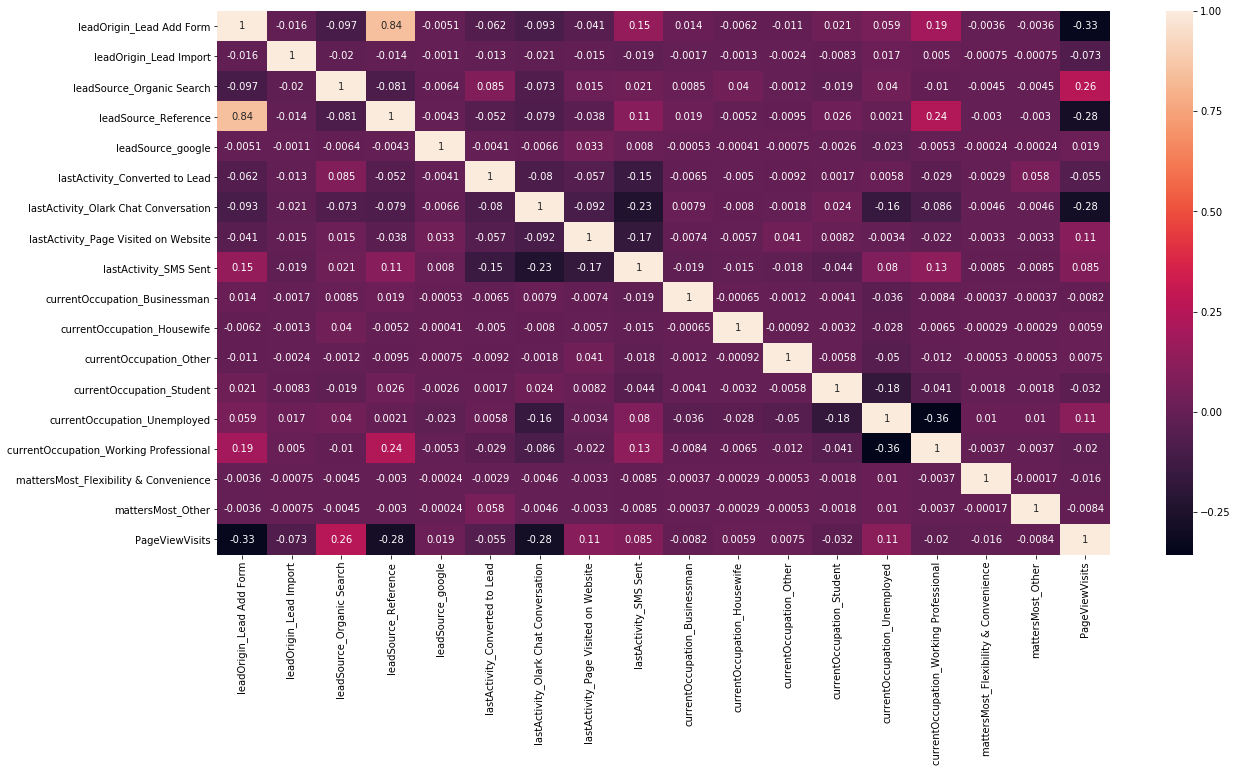

In [35]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train4.corr(),annot = True)

In [36]:
X_test5 = X_test4.drop(['leadOrigin_Lead Add Form','currentOccupation_Working Professional','PageViewVisits'],axis=1)
X_train5 = X_train4.drop(['leadOrigin_Lead Add Form','currentOccupation_Working Professional','PageViewVisits'],axis=1)

In [37]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train5)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5963
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3290.7
Date:                Sun, 03 Mar 2019   Deviance:                       6581.3
Time:                        13:22:46   Pearson chi2:                 6.10e+03
No. Iterations:                    21   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1239      0.061    -18.390      0.000      -1.244      -1.004
leadOrigin_Lead Import                   -0.5944      0.536     -1.109      0.267      -1.644       0.456
leadSource_Organic Search                -0.0423      0.094     -0.451      0.652      -0.226       0.142
leadSource_Reference                      2.9310      0.227     12.891      0.000       2.485       3.377
leadSource_google                       -21.9649   3.07e+04     -0.001      0.999   -6.02e+04    6.02e+04
lastActivity_Converted to Lead           -1.1981      0.188     -6.365      0.000      -1.567      -0.829
lastActivity_Olark Chat Conversation     -1.6248      0.152    -10.689      0.000      -1.923      -1.327
lastActivity_Page Visited on Website     -0.3795      0.131     -2.903      0.004      -0.636      -0.123
lastActivity_SMS Sent                     1.2436      0.066     18.961      0.000       1.115       1.372
currentOccupation_Businessman             1.5470      1.039      1.489      0.136      -0.489       3.583
currentOccupation_Housewife              23.7182   2.78e+04      0.001      0.999   -5.45e+04    5.46e+04
currentOccupation_Other                   1.2770      0.664      1.925      0.054      -0.023       2.577
currentOccupation_Student                 0.4026      0.224      1.801      0.072      -0.036       0.841
currentOccupation_Unemployed              0.4935      0.064      7.681      0.000       0.368       0.619
mattersMost_Flexibility & Convenience    23.1964   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
mattersMost_Other                       -20.7376   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
=========================================================================================================
"""

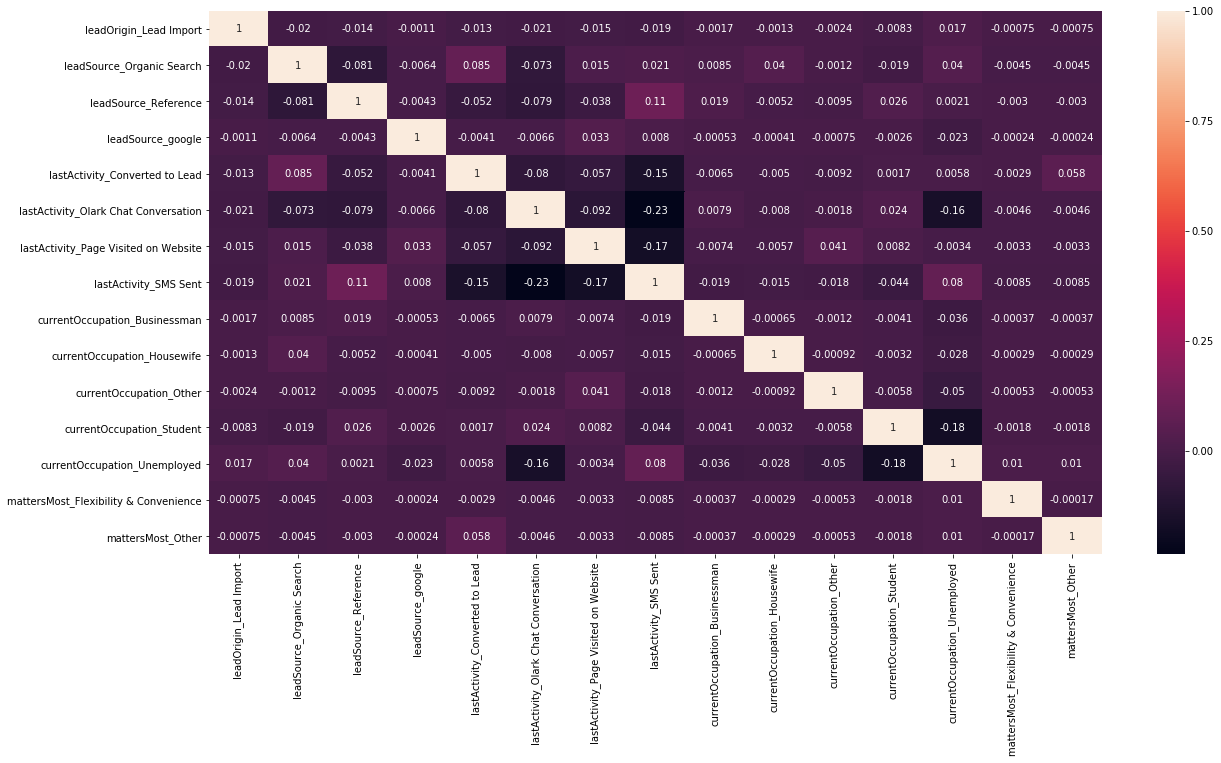

In [38]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train5.corr(),annot = True)

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False  True  True False False False  True False False False False  True
  True False  True False False  True False  True  True  True  True  True
 False False  True False]
[10  1  1 16  5 11  1  9  3  4  2  1  1 13  1 14 12  1  6  1  1  1  1  1
 15  7  1  8]


In [40]:
col = ['leadOrigin_Lead Import','leadSource_Organic Search','leadSource_Reference','leadSource_google',
       'lastActivity_Converted to Lead','lastActivity_Olark Chat Conversation','lastActivity_Page Visited on Website',
       'lastActivity_SMS Sent','currentOccupation_Businessman','currentOccupation_Housewife','currentOccupation_Other',
       'currentOccupation_Unemployed','mattersMost_Flexibility & Convenience','mattersMost_Other'
    ]

In [41]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('leadOrigin_Landing Page Submission', False, 10),
 ('leadOrigin_Lead Add Form', True, 1),
 ('leadOrigin_Lead Import', True, 1),
 ('leadOrigin_Quick Add Form', False, 16),
 ('leadSource_Direct Traffic', False, 5),
 ('leadSource_Google', False, 11),
 ('leadSource_Olark Chat', True, 1),
 ('leadSource_Organic Search', False, 9),
 ('leadSource_Reference', False, 3),
 ('leadSource_google', False, 4),
 ('lastActivity_Converted to Lead', False, 2),
 ('lastActivity_Email Opened', True, 1),
 ('lastActivity_Olark Chat Conversation', True, 1),
 ('lastActivity_Page Visited on Website', False, 13),
 ('lastActivity_SMS Sent', True, 1),
 ('lastActivity_Visited Booth in Tradeshow', False, 14),
 ('currentOccupation_Businessman', False, 12),
 ('currentOccupation_Housewife', True, 1),
 ('currentOccupation_Other', False, 6),
 ('currentOccupation_Student', True, 1),
 ('currentOccupation_Unemployed', True, 1),
 ('currentOccupation_Working Professional', True, 1),
 ('mattersMost_Better Career Prospects', Tr

In [42]:
col = X_train.columns[rfe.support_]

In [43]:
X_train.columns[~rfe.support_]

Index(['leadOrigin_Landing Page Submission', 'leadOrigin_Quick Add Form',
       'leadSource_Direct Traffic', 'leadSource_Google',
       'leadSource_Organic Search', 'leadSource_Reference',
       'leadSource_google', 'lastActivity_Converted to Lead',
       'lastActivity_Page Visited on Website',
       'lastActivity_Visited Booth in Tradeshow',
       'currentOccupation_Businessman', 'currentOccupation_Other',
       'mattersMost_Other', 'TotalVisits', 'PageViewVisits'],
      dtype='object')

In [44]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5965
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2454.3
Date:                Sun, 03 Mar 2019   Deviance:                       4908.6
Time:                        13:22:49   Pearson chi2:                 6.06e+03
No. Iterations:                    20   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -3.1005      0.120    -25.837      0.000      -3.336      -2.865
leadOrigin_Lead Add Form                   3.9952      0.220     18.162      0.000       3.564       4.426
leadOrigin_Lead Import                     0.4360      0.579      0.752      0.452      -0.700       1.572
leadSource_Olark Chat                      1.3916      0.108     12.917      0.000       1.180       1.603
lastActivity_Email Opened                  0.7886      0.104      7.588      0.000       0.585       0.992
lastActivity_Olark Chat Conversation      -0.8566      0.190     -4.503      0.000      -1.229      -0.484
lastActivity_SMS Sent                      1.8851      0.108     17.533      0.000       1.674       2.096
currentOccupation_Housewife               21.5709   1.41e+04      0.002      0.999   -2.75e+04    2.76e+04
currentOccupation_Student                 -0.5729      0.610     -0.940      0.347      -1.768       0.622
currentOccupation_Unemployed              -0.5531      0.569     -0.972      0.331      -1.668       0.562
currentOccupation_Working Professional     2.0246      0.589      3.439      0.001       0.871       3.178
mattersMost_Better Career Prospects        1.8596      0.570      3.264      0.001       0.743       2.976
mattersMost_Flexibility & Convenience     23.9877   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
TotalTimeWebsite                           1.0957      0.042     26.368      0.000       1.014       1.177
==========================================================================================================
"""

In [45]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1384    0.063993
2019    0.883070
3514    0.630542
5930    0.089712
1409    0.298801
1484    0.353257
4711    0.221443
9061    0.586315
3233    0.962983
7797    0.097356
dtype: float64

In [46]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06399348, 0.88306965, 0.63054229, 0.08971174, 0.29880102,
       0.35325679, 0.22144343, 0.58631529, 0.96298295, 0.09735558])

In [47]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['Lead'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,Lead
0,0,0.063993,1384
1,1,0.883070,2019
2,1,0.630542,3514
3,0,0.089712,5930
4,0,0.298801,1409


In [48]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.8 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,Lead,predicted
0,0,0.063993,1384,0
1,1,0.883070,2019,1
2,1,0.630542,3514,0
3,0,0.089712,5930,0
4,0,0.298801,1409,0


In [49]:
from sklearn import metrics

In [50]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3564  123]
 [1342  950]]


In [51]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7549757484529186


In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,mattersMost_Better Career Prospects,171.75
8,currentOccupation_Unemployed,147.56
9,currentOccupation_Working Professional,19.41
7,currentOccupation_Student,5.36
2,leadSource_Olark Chat,1.83
3,lastActivity_Email Opened,1.81
5,lastActivity_SMS Sent,1.79
4,lastActivity_Olark Chat Conversation,1.51
12,TotalTimeWebsite,1.34
0,leadOrigin_Lead Add Form,1.31


In [54]:
col = col.drop('mattersMost_Better Career Prospects', 1)
col

Index(['leadOrigin_Lead Add Form', 'leadOrigin_Lead Import',
       'leadSource_Olark Chat', 'lastActivity_Email Opened',
       'lastActivity_Olark Chat Conversation', 'lastActivity_SMS Sent',
       'currentOccupation_Housewife', 'currentOccupation_Student',
       'currentOccupation_Unemployed',
       'currentOccupation_Working Professional',
       'mattersMost_Flexibility & Convenience', 'TotalTimeWebsite'],
      dtype='object')

In [55]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5966
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2460.6
Date:                Sun, 03 Mar 2019   Deviance:                       4921.1
Time:                        13:22:51   Pearson chi2:                 6.05e+03
No. Iterations:                    20   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -3.0849      0.119    -25.828      0.000      -3.319      -2.851
leadOrigin_Lead Add Form                   4.0200      0.220     18.267      0.000       3.589       4.451
leadOrigin_Lead Import                     0.4483      0.577      0.776      0.438      -0.683       1.580
leadSource_Olark Chat                      1.3970      0.108     12.982      0.000       1.186       1.608
lastActivity_Email Opened                  0.8030      0.104      7.743      0.000       0.600       1.006
lastActivity_Olark Chat Conversation      -0.8408      0.190     -4.425      0.000      -1.213      -0.468
lastActivity_SMS Sent                      1.8906      0.107     17.605      0.000       1.680       2.101
currentOccupation_Housewife               23.4020    1.4e+04      0.002      0.999   -2.75e+04    2.75e+04
currentOccupation_Student                  1.2056      0.252      4.784      0.000       0.712       1.699
currentOccupation_Unemployed               1.2788      0.089     14.311      0.000       1.104       1.454
currentOccupation_Working Professional     3.8047      0.204     18.673      0.000       3.405       4.204
mattersMost_Flexibility & Convenience     22.1278   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
TotalTimeWebsite                           1.1042      0.042     26.590      0.000       1.023       1.186
==========================================================================================================
"""

In [56]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [57]:
y_train_pred[:10]

array([0.06564111, 0.87955176, 0.62850814, 0.09022778, 0.29586483,
       0.35049251, 0.22150982, 0.59857697, 0.96101221, 0.09290073])

In [58]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [59]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.8 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Lead,predicted
0,0,0.065641,1384,0
1,1,0.879552,2019,1
2,1,0.628508,3514,0
3,0,0.090228,5930,0
4,0,0.295865,1409,0


In [60]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7543067402575682


In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,currentOccupation_Unemployed,2.22
2,leadSource_Olark Chat,1.82
3,lastActivity_Email Opened,1.80
5,lastActivity_SMS Sent,1.79
4,lastActivity_Olark Chat Conversation,1.51
11,TotalTimeWebsite,1.33
0,leadOrigin_Lead Add Form,1.31
9,currentOccupation_Working Professional,1.28
7,currentOccupation_Student,1.04
1,leadOrigin_Lead Import,1.01


In [62]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3564,  123],
       [1346,  946]], dtype=int64)

In [63]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.7543067402575682

In [64]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [65]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.41273996509598604

In [66]:
# Let us calculate specificity
TN / float(TN+FP)

0.9666395443449959

In [67]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03336045565500407


In [68]:
# positive predictive value 
print (TP / float(TP+FP))

0.8849391955098223


In [69]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7258655804480652


In [70]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [71]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

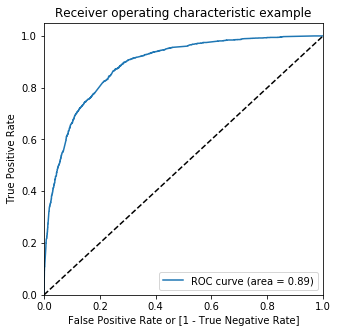

In [72]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [73]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Lead,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.065641,1384,0,1,0,0,0,0,0,0,0,0,0
1,1,0.879552,2019,1,1,1,1,1,1,1,1,1,1,0
2,1,0.628508,3514,0,1,1,1,1,1,1,1,0,0,0
3,0,0.090228,5930,0,1,0,0,0,0,0,0,0,0,0
4,0,0.295865,1409,0,1,1,1,0,0,0,0,0,0,0


In [74]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383342  1.000000  0.000000
0.1   0.1  0.632547  0.974695  0.419854
0.2   0.2  0.755812  0.921902  0.652563
0.3   0.3  0.790099  0.874782  0.737456
0.4   0.4  0.807995  0.755672  0.840521
0.5   0.5  0.813347  0.688045  0.891239
0.6   0.6  0.801974  0.617801  0.916463
0.7   0.7  0.777220  0.506981  0.945213
0.8   0.8  0.754307  0.412740  0.966640
0.9   0.9  0.707142  0.256545  0.987253


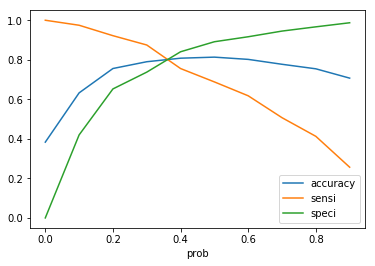

In [75]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [76]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,Lead,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.065641,1384,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.879552,2019,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.628508,3514,0,1,1,1,1,1,1,1,0,0,0,1
3,0,0.090228,5930,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.295865,1409,0,1,1,1,0,0,0,0,0,0,0,0


In [77]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7900986787088142

In [78]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2719,  968],
       [ 287, 2005]], dtype=int64)

In [79]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [80]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.87478184991274

In [81]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.26254407377271494


In [82]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6744029599730912


In [83]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9045242847638058


In [84]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3564,  123],
       [1346,  946]], dtype=int64)

In [85]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8849391955098223

In [86]:
from sklearn.metrics import precision_score, recall_score

In [87]:
?precision_score

In [88]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8849391955098223

In [89]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.41273996509598604

In [90]:
from sklearn.metrics import precision_recall_curve

In [91]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       1
 2       1
 3       0
 4       0
 5       0
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      1
 13      0
 14      0
 15      0
 16      0
 17      1
 18      0
 19      1
 20      1
 21      0
 22      1
 23      0
 24      0
 25      1
 26      1
 27      1
 28      0
 29      1
        ..
 5949    0
 5950    0
 5951    1
 5952    1
 5953    0
 5954    0
 5955    1
 5956    1
 5957    0
 5958    0
 5959    1
 5960    0
 5961    0
 5962    1
 5963    1
 5964    1
 5965    0
 5966    1
 5967    0
 5968    0
 5969    0
 5970    0
 5971    1
 5972    1
 5973    1
 5974    0
 5975    0
 5976    0
 5977    0
 5978    1
 Name: Churn, Length: 5979, dtype: int64, 0       0
 1       1
 2       0
 3       0
 4       0
 5       0
 6       0
 7       0
 8       1
 9       0
 10      0
 11      0
 12      0
 13      0
 14      0
 15      1
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      0
 2

In [92]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

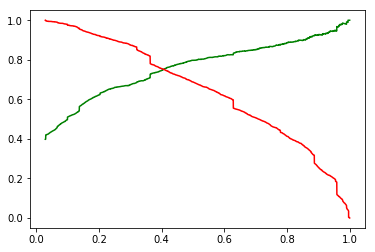

In [93]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [94]:
X_test = X_test[col]
X_test.head()

,leadOrigin_Lead Add Form,leadOrigin_Lead Import,leadSource_Olark Chat,lastActivity_Email Opened,lastActivity_Olark Chat Conversation,lastActivity_SMS Sent,currentOccupation_Housewife,currentOccupation_Student,currentOccupation_Unemployed,currentOccupation_Working Professional,mattersMost_Flexibility & Convenience,TotalTimeWebsite
7191,0,0,0,1,0,0,0,0,0,1,0,1.173840
1008,0,0,0,1,0,0,0,0,1,0,0,-0.585387
3494,0,0,0,0,0,1,0,1,0,0,0,1.212524
3298,0,0,0,0,0,1,0,0,1,0,0,0.022513
5646,1,0,0,1,0,0,0,0,1,0,0,-0.865390


In [95]:
X_test_sm = sm.add_constant(X_test)

In [96]:
y_test_pred = res.predict(X_test_sm)

In [97]:
y_test_pred[:10]

7191    0.943693
1008    0.161181
3494    0.794152
3298    0.527296
5646    0.887091
4485    0.850767
5577    0.954857
4165    0.230396
4539    0.628508
5568    0.198254
dtype: float64

In [98]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7191,0.943693
1008,0.161181
3494,0.794152
3298,0.527296
5646,0.887091


In [99]:
y_test_df = pd.DataFrame(y_test)

In [100]:
y_test_df['Lead'] = y_test_df.index

In [101]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [102]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [103]:
y_pred_final.head()

,Converted,Lead,0
0,0,7191,0.943693
1,1,1008,0.161181
2,1,3494,0.794152
3,1,3298,0.527296
4,1,5646,0.887091


In [104]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'ConvertProbability'})

In [105]:
y_pred_final = y_pred_final.reindex_axis(['Lead','Converted','ConvertProbability'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


In [106]:
y_pred_final.head()

,Lead,Converted,ConvertProbability
0,7191,0,0.943693
1,1008,1,0.161181
2,3494,1,0.794152
3,3298,1,0.527296
4,5646,1,0.887091


In [107]:
y_pred_final['final_predicted'] = y_pred_final.ConvertProbability.map(lambda x: 1 if x > 0.42 else 0)

In [108]:
y_pred_final.head()

,Lead,Converted,ConvertProbability,final_predicted
0,7191,0,0.943693,1
1,1008,1,0.161181,0
2,3494,1,0.794152,1
3,3298,1,0.527296,1
4,5646,1,0.887091,1


In [109]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8115489660554038

In [110]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1375,  248],
       [ 235,  705]], dtype=int64)

In [111]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.75

In [113]:
# Let us calculate specificity
TN / float(TN+FP)

0.8471965495995071